In [1]:

import sys
sys.path.insert(1, "src_code/")
import process_rdf as prdf
import torch


In [3]:
filename_mat = "/home/onofre/Dropbox/UIB/Internship_Siegen/Datasets/Thz_imaging/USAF_PCB_01_02625_750_G.mat"
filename_mat = r"C:\Users\lgrli\Downloads\700GHz\700GHz\AMITIE_Tepex_WRC1331_5_Poren_UK_750GHz_0009_N_N.rdf"
device = 'cpu'
complex_raw_data, parameters = prdf.read_mat(filename_mat, device=device)
print("Complex raw data shape: ", complex_raw_data.shape, parameters)

Wrong filename format, this function only reads .mat files. Return empty


TypeError: cannot unpack non-iterable NoneType object

In [ ]:

processed_data, max_val_abs = prdf.process_complex_data(complex_raw_data, int(parameters["NF"]), device=device)

: 

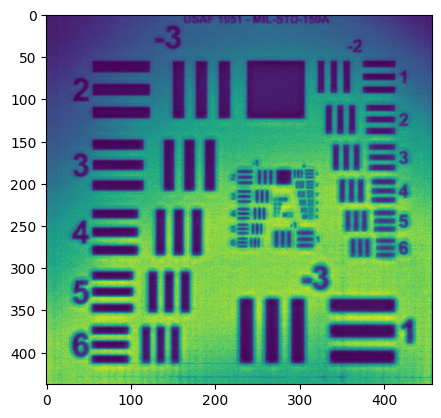

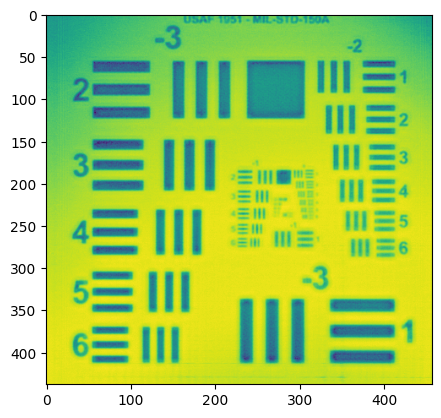

In [ ]:
import matplotlib.pyplot as plt
import skimage
import numpy as np
# Select layer of depth
depth_layer = 701
image_depth = torch.flipud(torch.pow(torch.abs(processed_data[depth_layer, ...]), 2)/max_val_abs).transpose(0, 1).detach().cpu().numpy()


plt.imshow(image_depth)
plt.show()
plt.imshow(10*np.log10( image_depth))


skimage.io.imsave('USAF_images/image_z_' + str(depth_layer) + '.tiff', image_depth, plugin="tifffile", check_contrast=False)
#skimage.io.imsave('USAF_images/log_image_z_' + str(depth_layer) + '.tiff', 10*np.log10( image_depth), plugin="tifffile", check_contrast=False)

torch.Size([438, 457])


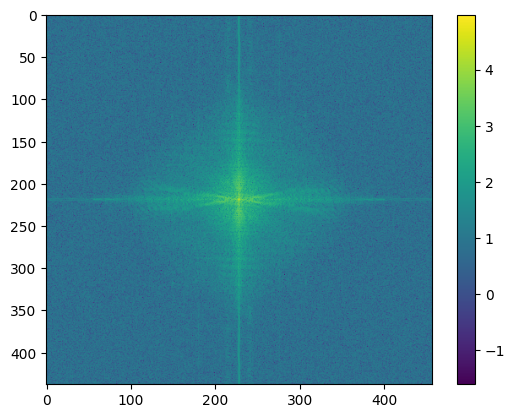

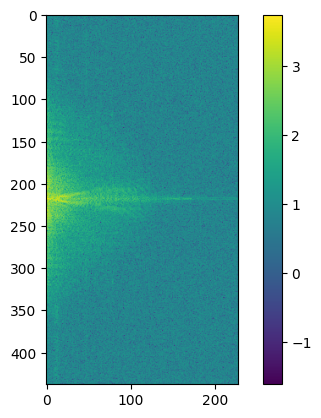

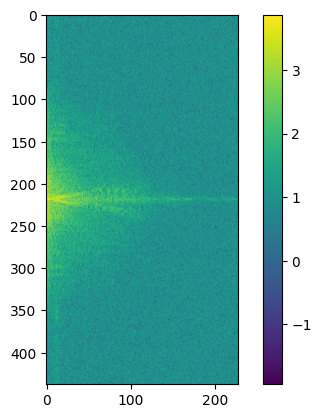

In [ ]:
depth_layer = 701
image_depth = torch.flipud(torch.pow(torch.abs(processed_data[depth_layer, ...]), 2)/max_val_abs).transpose(0, 1).detach().cpu()

print(image_depth.shape)
fft_image = torch.fft.fftshift(torch.fft.fft2(image_depth))
plt.imshow(torch.log10(torch.abs(fft_image)))
plt.colorbar()
plt.show()

half_fft = fft_image[:, :fft_image.shape[1]//2]
rotated_half_fft = torch.rot90(half_fft, k=2, dims=(0, 1))
plt.imshow(torch.log10(torch.abs(rotated_half_fft)))
plt.colorbar()
plt.show()


diff = torch.abs(fft_image[:, fft_image.shape[1]//2 + 1:] - rotated_half_fft)
plt.imshow(torch.log10(torch.abs(diff)))
plt.colorbar()
plt.show()

In [ ]:
print(max_val_abs)


tensor(721961.0625, device='cuda:0')
